# Overview

This notebook is processed on my local machine as kaggle only provides 20 GB for the output directory which is much less for this work as CLAHE implementation of 112k 1024x1024 images will solely consume 61 GB. 

I had done all the preprocessing and it actually took very long to do all this work so I have also uploaded the preprocessed dataset on kaggle itself so that you can directly use them.

I am linking all the datasets here, you can go to `Data Card` to get the overview:
- [NIH Chest X-rays](https://www.kaggle.com/datasets/nih-chest-xrays/data)
- [NIH CLAHE Enhanced Chest X-rays](https://www.kaggle.com/datasets/rahulogoel/clahe-enhancement-on-chestx-ray14)
- [NIH Balanced Chest X-rays](https://www.kaggle.com/datasets/rahulogoel/nih-balanced-chest-x-rays/data)
- [NIH Balanced & Resized Chest X-rays](https://www.kaggle.com/datasets/rahulogoel/nih-balanced-and-resized-chest-x-rays)

Lastly, below is the code for all the preprocessing done on the above datasets so you can go through it if you want and if you have any questions then feel free to ask me in the comments section.

# Code

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"Dataset/Data_Entry_2017.csv")

In [ ]:
df.head(10)

# One Hot Encoding

In [ ]:
labels = df["Finding Labels"].unique()
n_labels = [x.split('|') for x in list(df["Finding Labels"])]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
y = multilabel_binarizer.fit_transform(n_labels)

extract_labels = list(multilabel_binarizer.classes_)
extract_labels

In [ ]:
y

In [ ]:
n_df = pd.DataFrame(y)
n_df = n_df.set_axis(extract_labels, axis = 1)
# n_df.drop("No Finding",axis=1 ,inplace= True)
n_df.insert(0,"Path", value=df["Image Index"])
n_df.head(10)

In [ ]:
n_df.to_csv("labels.csv", index = False)

In [ ]:
# # ImageFilter for using filter() function 
# from PIL import Image, ImageFilter 
  
# # Opening the image  
# # (R prefixed to string in order to deal with '\' in paths) 
# image = Image.open(r"Dataset/00000001_000.png") 
  
# # Blurring image by sending the ImageFilter. 
# # GaussianBlur predefined kernel argument 
# image = image.filter(ImageFilter.GaussianBlur) 
  
# # Displaying the image 
# image.show()

# CLAHE

In [ ]:
# import the modules
import os
import cv2
from PIL import Image

# get the path/directory
folder_dir = "Dataset/images"
for images in os.listdir(folder_dir):
 
    # Reading the image from the present directory
    image = cv2.imread(f"Dataset/images/{images}")
    
    # The initial processing of the image
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # The declaration of CLAHE
    # clipLimit -> Threshold for contrast limiting
    # tileGridSize -> Number of tiles in the row and column
    clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(10, 10))
    final_img = clahe.apply(image_bw)

    # Adjust the brightness of the output
    final_img = cv2.add(final_img, 5)
    
    #Saving the image in seperate folder
    im = Image.fromarray(final_img) 
    image_path = "Dataset/IMAGE"
    im.save(f"{image_path}/{images}")
print("Task Completed")

# Data Preprocessing

In [ ]:
n_df = pd.read_csv("labels.csv", index_col=0)

In [ ]:
n_df

In [ ]:
def total_instances():
    
    total_data = []

    for i in extract_labels:
        total = n_df[i].value_counts()[1]
        total_data.append(total)

    return total_data

In [ ]:
total_data = total_instances()

In [ ]:
total_data

In [ ]:
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

In [ ]:
def show_plot():
    total_data = []
    for i in extract_labels:
        total = n_df[i].value_counts()[1]
        total_data.append(total)

    ax = pd.DataFrame({'li': extract_labels, 'total_data': total_data})
    fig = sns.barplot(x = "li", y = "total_data",data = ax)
    plt.xlabel("Classes")
    plt.ylabel("Counts")
    plt.title("Counts")
    plt.xticks(rotation = 90)
    plt.show(fig)

In [ ]:
show_plot()

# Undersampling

To balance the classes I will first randomly remove some rows of certain classes to achieve balance in the dataset.

No Finding

60,361 - 5,000 = 55361

In [ ]:
a = (n_df[n_df["No Finding"] == 1].sample(55361).index)
list(a)
len(a)

In [ ]:
for i in a:
    n_df.drop(index = i, inplace=True)

In [ ]:
n_df.shape, n_df["No Finding"].value_counts()

In [ ]:
show_plot()

So here the total rows for "No Finding" has dropped to 5000. Now, its time to balance next class.

Infiltration

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

19894 - 5000 = 14894

In [ ]:
a = (n_df[n_df["Infiltration"] == 1].sample(14894).index)
print(list(a))

In [ ]:
for i in a:
    n_df.drop(index = i, inplace=True)

In [ ]:
n_df.shape, n_df["Infiltration"].value_counts()

In [ ]:
show_plot()

Effusion

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

10296 - 5000 = 5296

In [ ]:
a = (n_df[n_df["Effusion"] == 1].sample(5296).index)
print(list(a))

In [ ]:
for i in a:
    n_df.drop(index = i, inplace=True)

In [ ]:
n_df.shape, n_df["Effusion"].value_counts()

In [ ]:
show_plot()

Atelectasis

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

7931 - 5000 = 2931

In [ ]:
a = (n_df[n_df["Atelectasis"] == 1].sample(2931).index)
print(list(a))

In [ ]:
for i in a:
    n_df.drop(index = i, inplace=True)

In [ ]:
n_df.shape, n_df["Atelectasis"].value_counts()

In [ ]:
show_plot()

In [ ]:
n_df.shape

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Now the maximum instance of any class is not more than 5000 so undersampling is done and will proceed towards oversampling/data augmentation so that each class will contain around 5000 instances.

Before continuing further, we will delete the instance image form the image dataset. Currently there are 112120 images in the dataset and I will reduce it to 33638.

112120 - 33638 = 78482

In [ ]:
my_path = r"C:\Research\Dataset\new_images"

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
allfiles = [f for f in listdir(my_path) if isfile(join(my_path, f))]
len(allfiles)

In [ ]:
to_be_kept = n_df['Path'].tolist()
to_be_deleted = [item for item in allfiles if item not in to_be_kept ]

In [ ]:
import os

In [ ]:
for file in to_be_deleted:
    os.remove(join(my_path, file))

In [ ]:
allfiles = [f for f in listdir(my_path) if isfile(join(my_path, f))]
len(allfiles)

# Oversampling

First I will start from hernia as it has the lowest instances among any of the classes.

Hernia

5000 - 182 = 4818

In [ ]:
n_df.shape

In [ ]:
n_df.to_csv("tempfile.csv", index= False)

In [ ]:
t_df = n_df
t_df

In [ ]:
t_df = t_df.reset_index(drop = True)
t_df

In [ ]:
import albumentations as A

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [ ]:
import cv2

In [ ]:
index_no = (t_df[t_df["Hernia"] == 1].sample(182).index)
index_no


In [ ]:
from tqdm import tqdm

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

In [ ]:
len(index_list)

In [ ]:
index_list = np.array(index_list)
index_list.shape

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(),
    A.RandomRotate90() , 
    A.Sharpen(p = 1),
    A.VerticalFlip(),
])

images needed = (5000 - 182 ==> 4818)

now, we have total 182 images so,

4818 / 182 ==> 26.47

This means we need to iterate around 26 times on the same image for data aumentation.

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import random
def random_name():
        digits =  12
        return random.randrange(111111111111, 999999999999, digits)

In [ ]:
index_no[0]

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
for i in tqdm(range(0, len(index_no))):
    for j in range(26):
        transformed_image = transform(image = index_list[i])["image"]
        image_path = r"C:\Research\Dataset\new_images"
        image_name = str(random_name())
        plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

        t_df = t_df._append(t_df.iloc[index_no[i]])
        t_df = t_df.reset_index(drop = True)
        t_df["Path"].iloc[-1] = f"{image_name}.png"


In [ ]:
t_df.tail()

In [ ]:
t_df.to_csv("del.csv")

In [ ]:
t_df.shape

In [ ]:
n_df = t_df
n_df.shape

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

In [ ]:
show_plot()

Now, next class will be Pneumonia

In [ ]:
index_no = (t_df[t_df["Pneumonia"] == 1].sample(853).index)
index_no

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

In [ ]:
len(index_list)

In [ ]:
index_list = np.array(index_list)
index_list.shape

images needed = (5000 - 853 ==> 4147)

4147 / 853 ==> 4.86

now, we will iterate 5 times per image

In [ ]:
index_no[0]

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
len(index_no)

In [ ]:
for i in tqdm(range(0, len(index_no))):
    for j in range(5):
        transformed_image = transform(image = index_list[i])["image"]
        image_path = r"C:\Research\Dataset\new_images"
        image_name = str(random_name())
        plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

        t_df = t_df._append(t_df.iloc[index_no[i]])
        t_df = t_df.reset_index(drop = True)
        t_df["Path"].iloc[-1] = f"{image_name}.png"

In [ ]:
t_df.to_csv("del.csv")
t_df.shape

In [ ]:
n_df = t_df
n_df.shape

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

In [ ]:
show_plot()

Fibrosis

In [ ]:
index_no = (t_df[t_df["Fibrosis"] == 1].sample(1506).index)
index_no

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

In [ ]:
len(index_list)

In [ ]:
index_list = np.array(index_list)
index_list.shape

images needed = (5000 - 1506 ==> 3494)

3494 / 1506 ==> 2.32

now this time, we have to iterate over 2 times per image

In [ ]:
index_no[0]

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
len(index_no)

In [ ]:
for i in tqdm(range(0, len(index_no))):
    for j in range(2):
        transformed_image = transform(image = index_list[i])["image"]
        image_path = r"C:\Research\Dataset\new_images"
        image_name = str(random_name())
        plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

        t_df = t_df._append(t_df.iloc[index_no[i]])
        t_df = t_df.reset_index(drop = True)
        t_df["Path"].iloc[-1] = f"{image_name}.png"

In [ ]:
t_df.to_csv("del.csv")
t_df.shape

In [ ]:
t_df.tail()

In [ ]:
index_no[-1]

In [ ]:
n_df = t_df
n_df.shape

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

In [ ]:
show_plot()

Edema

In [ ]:
index_no = (t_df[t_df["Edema"] == 1].sample(2191).index)
index_no

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

In [ ]:
len(index_list)

In [ ]:
index_list = np.array(index_list)
index_list.shape

images needed = (5000 - 2191 ==> 2809)

2809 / 2191 ==> 1.28

now this time, we only have to iterate over 1 time per image

In [ ]:
index_no[0]

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
len(index_no)

In [ ]:
for i in tqdm(range(0, len(index_no))):
    for j in range(1):
        transformed_image = transform(image = index_list[i])["image"]
        image_path = r"C:\Research\Dataset\new_images"
        image_name = str(random_name())
        plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

        t_df = t_df._append(t_df.iloc[index_no[i]])
        t_df = t_df.reset_index(drop = True)
        t_df["Path"].iloc[-1] = f"{image_name}.png"

In [ ]:
t_df.to_csv("del.csv")
t_df.shape

In [ ]:
t_df.tail()

In [ ]:
index_no[-1]

In [ ]:
n_df = t_df
n_df.shape

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

In [ ]:
show_plot()

Emphysema

In [ ]:
index_no = (t_df[t_df["Emphysema"] == 1].sample(2215).index)
index_no

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

In [ ]:
len(index_list)

In [ ]:
index_list = np.array(index_list)
index_list.shape

images needed = (5000 - 2215 ==> 2785)

2785 / 2215 ==> 1.25

we will iterate only once per image in this case

In [ ]:
index_no[0]

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
len(index_no)

In [ ]:
for i in tqdm(range(0, len(index_no))):
    transformed_image = transform(image = index_list[i])["image"]
    image_path = r"C:\Research\Dataset\new_images"
    image_name = str(random_name())
    plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

    t_df = t_df._append(t_df.iloc[index_no[i]])
    t_df = t_df.reset_index(drop = True)
    t_df["Path"].iloc[-1] = f"{image_name}.png"

In [ ]:
t_df.to_csv("del.csv")
t_df.shape

In [ ]:
t_df.tail()

In [ ]:
index_no[-1]

In [ ]:
n_df = t_df
n_df.shape

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

In [ ]:
show_plot()

Cardiomegaly

Although we have 2399 iamges for cardiomegaly, we will only use 1300 images for data augmentation

In [ ]:
index_no = (t_df[t_df["Cardiomegaly"] == 1].sample(1300).index)
index_no

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

In [ ]:
len(index_list)

In [ ]:
index_list = np.array(index_list)
index_list.shape

images needed = (5000 - 2399 ===> 2601)

2601 / 2399 ==> 2.0007

now, we will iterate twice per image.

In [ ]:
index_no[0]

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
len(index_no)

We will decrease the sharpen in transform data augmentation from 1 to 0.5 as in previous augmentations all the images are sharpen but when we further transform other classes then it can take the sample images again for augmentation as it is multi-label data so inspite of sharpening the image once, it will sharpen it 2 or in some cases 3 times also which will degrade image quality.

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(),
    A.RandomRotate90() , 
    A.Sharpen(p = 0.5),
    A.VerticalFlip(),
])

In [ ]:
for i in tqdm(range(0, len(index_no))):
    for j in range(2):
        transformed_image = transform(image = index_list[i])["image"]
        image_path = r"C:\Research\Dataset\new_images"
        image_name = str(random_name())
        plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

        t_df = t_df._append(t_df.iloc[index_no[i]])
        t_df = t_df.reset_index(drop = True)
        t_df["Path"].iloc[-1] = f"{image_name}.png"

In [ ]:
t_df.to_csv("del.csv")
t_df.shape

In [ ]:
t_df.tail()

In [ ]:
index_no[-1]

In [ ]:
n_df = t_df
n_df.shape

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

In [ ]:
show_plot()

Pleural_Thickening

in this case also, we have 3090 images of Pleural_Thickening but we will use only 1000 images for data augmentation.

In [ ]:
index_no = (t_df[t_df["Pleural_Thickening"] == 1].sample(1000).index)
index_no

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

In [ ]:
# len(index_list)

In [ ]:
# index_list = np.array(index_list)
# index_list.shape

<!-- images needed = (5000 - 3090 ==> 1910)

1901 / 1000 ==> 1.91

now again, we will iterate twice per image. -->

In [ ]:
# index_no[0]

In [ ]:
# t_df.to_csv("new_labels.csv")

In [ ]:
# len(index_no)

As we have more sharpen images so will reduce the probablity of sharpen by 10%.

In [ ]:
# transform = A.Compose([
#     A.HorizontalFlip(),
#     A.RandomRotate90() , 
#     A.Sharpen(p = 0.4),
#     A.VerticalFlip(),
# ])

In [ ]:
# for i in tqdm(range(0, len(index_no))):
#     for j in range(2):
#         transformed_image = transform(image = index_list[i])["image"]
#         image_path = r"C:\Research\Dataset\new_images"
#         image_name = str(random_name())
#         plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

#         t_df = t_df._append(t_df.iloc[index_no[i]])
#         t_df = t_df.reset_index(drop = True)
#         t_df["Path"].iloc[-1] = f"{image_name}.png"

In [ ]:
# t_df.to_csv("del.csv")
# t_df.shape

In [ ]:
# t_df.tail()

In [ ]:
# index_no[-1]

In [ ]:
# n_df = t_df
# n_df.shape

In [ ]:
# total_data = total_instances()
# for i in range(len(total_data)):
#     print(f"{extract_labels[i]} = {total_data[i]} ")

In [ ]:
# show_plot()

Consolidation

in this case,  we will use only 500 images for data aug.

In [ ]:
# index_no = (t_df[t_df["Consolidation"] == 1].sample(500).index)
# index_no

In [ ]:
# index_list = []

In [ ]:
# for i in tqdm(index_no):
#     path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
#     img = image.load_img(path, target_size=(1024, 1024, 3))
#     img = image.img_to_array(img)
#     img = img/255.0
#     index_list.append(img)

In [ ]:
# len(index_list)

In [ ]:
# index_list = np.array(index_list)
# index_list.shape

images needed = (5000 - 3962 ==> 1038)

1038 / 500 = 2.07

we will again iterate twice per 500 images.


In [ ]:
# index_no[0]

In [ ]:
# t_df.to_csv("new_labels.csv")

In [ ]:
# len(index_no)

decreasing sharpen image probab by another 10%

In [ ]:
# transform = A.Compose([
#     A.HorizontalFlip(),
#     A.RandomRotate90() , 
#     A.Sharpen(p = 0.3),
#     A.VerticalFlip(),
# ])

In [ ]:
# for i in tqdm(range(0, len(index_no))):
#     for j in range(2):
#         transformed_image = transform(image = index_list[i])["image"]
#         image_path = r"C:\Research\Dataset\new_images"
#         image_name = str(random_name())
#         plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

#         t_df = t_df._append(t_df.iloc[index_no[i]])
#         t_df = t_df.reset_index(drop = True)
#         t_df["Path"].iloc[-1] = f"{image_name}.png"

In [ ]:
# t_df.to_csv("del.csv")
# t_df.shape

In [ ]:
# t_df.tail()

In [ ]:
# index_no[-1]

In [ ]:
# n_df = t_df
# n_df.shape

In [ ]:
# total_data = total_instances()
# for i in range(len(total_data)):
#     print(f"{extract_labels[i]} = {total_data[i]} ")

In [ ]:
# show_plot()

In [ ]:
# t_df.to_csv("new_labels.csv")

Now, almost all of our classes are balanced with images of around 5000 but still 2 classes that is Atelectasis and Effusion and containing images over 7000 so we will have to undersample these 2 classes.

In [ ]:
# total_data = total_instances()
# for i in range(len(total_data)):
#     print(f"{extract_labels[i]} = {total_data[i]} ")

7401 - 5000 = 2401

In [ ]:
# a = (n_df[n_df["Atelectasis"] == 1].sample(2401).index)
# print(list(a))

In [ ]:
# for i in a:
#     n_df.drop(index = i, inplace=True)

NOTE: The images are only dropped from dataframe not from out folder so that we will do it later at once.

In [ ]:
# n_df.shape, n_df["Atelectasis"].value_counts()

In [ ]:
# show_plot()

In [ ]:
# n_df.shape

Effusion

In [ ]:
# total_data = total_instances()
# for i in range(len(total_data)):
#     print(f"{extract_labels[i]} = {total_data[i]} ")

6870 - 5000 = 1870

In [ ]:
# a = (n_df[n_df["Effusion"] == 1].sample(1870).index)
# print(list(a))

In [ ]:
# for i in a:
#     n_df.drop(index = i, inplace=True)

In [ ]:
# n_df.shape, n_df["Effusion"].value_counts()

In [ ]:
# show_plot()

In [ ]:
# total_data = total_instances()
# for i in range(len(total_data)):
#     print(f"{extract_labels[i]} = {total_data[i]} ")

In [ ]:
# n_df.shape

Now, finally we gonna drop the images from our dataset folder also which we earlier drop from our dataframe.

In [ ]:
# my_path = r"C:\Research\Dataset\new_images"
# allfiles = [f for f in listdir(my_path) if isfile(join(my_path, f))]
# len(allfiles)

In [ ]:
# to_be_kept = n_df['Path'].tolist()
# to_be_deleted = [item for item in allfiles if item not in to_be_kept ]

In [ ]:
# for file in to_be_deleted:
#     os.remove(join(my_path, file))

In [ ]:
# allfiles = [f for f in listdir(my_path) if isfile(join(my_path, f))]
# len(allfiles)

In [ ]:
# n_df.shape

Here we can see that our dataframe and image folder contain same number of images.

So, now our previously highly imbalanced dataset is now balanced and further it is ready for training :)

In [ ]:
# n_df = pd.read_csv("new_labels.csv", index_col=0)

In [ ]:
# n_df = pd.read_csv("new_labels.csv")

In [ ]:
# n_df

In [ ]:
# n_df.shape

In [ ]:
# n_df["Path"].nunique()

In [ ]:
# n_df

# Dataset ready!!

In [ ]:
# n_df.to_csv("new_labels.csv", index=False)

# Setting Up the Model

In [1]:
# !pip install tensorflow
import os

# Path to the output directory
output_folder = "/kaggle/working/"

# Loop through and remove all files
for file in os.listdir(output_folder):
    file_path = os.path.join(output_folder, file)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)  # Remove file
        elif os.path.isdir(file_path):
            os.rmdir(file_path)  # Remove empty folder
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")



In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from os import listdir
import pickle
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers

%matplotlib inline
print("TensorFlow Version:", tf.__version__)


E0000 00:00:1743587449.896473      10 common_lib.cc:612] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:230


TensorFlow Version: 2.18.0


In [3]:
import tensorflow as tf
print("Available devices:", tf.config.list_physical_devices())


Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:TPU_SYSTEM:0', device_type='TPU_SYSTEM'), PhysicalDevice(name='/physical_device:TPU:0', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:1', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:2', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:3', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:4', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:5', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:6', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:7', device_type='TPU')]


In [4]:
strategy = tf.distribute.MirroredStrategy()
print("Number of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


I0000 00:00:1743587472.850591      10 service.cc:148] XLA service 0x5945b5dd8210 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743587472.850630      10 service.cc:156]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1743587472.850634      10 service.cc:156]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1743587472.850637      10 service.cc:156]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1743587472.850640      10 service.cc:156]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1743587472.850643      10 service.cc:156]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1743587472.850645      10 service.cc:156]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1743587472.850648      10 service.cc:156]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1743587472.850651      10 service.cc:156]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Number of GPUs Available:  0


In [5]:
df = pd.read_csv("../input/nih-balanced-and-resized-chest-x-rays/new_labels.csv")

In [6]:
import pandas as pd
import numpy as np

# Load dataset labels CSV
df = pd.read_csv("/kaggle/input/nih-balanced-and-resized-chest-x-rays/new_labels.csv")  # Ensure it has 'image_path' and one-hot encoded labels

# Extract class names (assuming first column is 'image_path', rest are one-hot encoded labels)
class_names = df.columns[1:]  # Skip 'image_path' column

# Convert one-hot encoding to class labels
df["label"] = df[class_names].idxmax(axis=1)  # Get the class name from one-hot encoding

# Target number of images per class
target_count = 3000  # Adjust as needed

# Randomly select images per class
selected_df = df.groupby("label", group_keys=False).apply(lambda x: x.sample(min(len(x), target_count)))

# Drop the "label" column to keep the one-hot encoding
selected_df = selected_df.drop(columns=["label"])

# Print the new count of images in each class
class_counts = selected_df[class_names].sum(axis=0).astype(int)  # Count per class
print("\nNew dataset class distribution:")
print(class_counts)

# Save selected subset to a new CSV file
selected_df.to_csv("selected_labels.csv", index=False)

print("\nSubset selection complete. Saved as 'selected_labels.csv'.")


/tmp/ipykernel_10/2910044028.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  selected_df = df.groupby("label", group_keys=False).apply(lambda x: x.sample(min(len(x), target_count)))



New dataset class distribution:
Atelectasis           3000
Cardiomegaly          3146
Consolidation         3500
Edema                 3594
Effusion              4343
Emphysema             3592
Fibrosis              4042
Hernia                4326
Infiltration          4953
Mass                  4956
No Finding            3000
Nodule                5076
Pleural_Thickening    4428
Pneumonia             5335
Pneumothorax          4497
dtype: int64

Subset selection complete. Saved as 'selected_labels.csv'.


In [7]:
selected_df.head()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
36630,669374090115.png,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9650,00009348_000.png,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
142,00000103_010.png,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11619,00010984_002.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35339,253427526399.png,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [8]:
data = selected_df.sample(frac=1).reset_index(drop=True)

In [9]:
data.head()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,222780899247.png,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,00005406_000.png,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,00007948_001.png,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,00020124_002.png,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,00012045_039.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
X = []
for i in tqdm(range(data.shape[0])):
    path = '../input/nih-balanced-and-resized-chest-x-rays/resized_images/resized_images/' + data['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(224, 224, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)


100%|██████████| 42051/42051 [05:59<00:00, 117.02it/s]


In [11]:
X = np.array(X)
X.shape

(42051, 224, 224, 3)

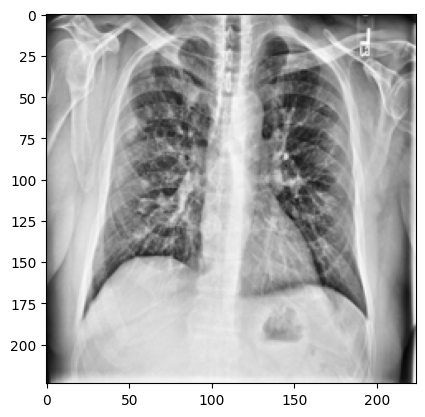

In [12]:
plt.imshow(X[1])

In [13]:
y = data.drop("Path", axis = 1)
y = y.to_numpy()
y.shape

(42051, 15)

In [46]:
print(y[0])
y

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18, shuffle =True)

In [16]:
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape), (X_test.shape, y_test.shape)

(((29309, 224, 224, 3), (29309, 15)),
 ((6434, 224, 224, 3), (6434, 15)),
 ((6308, 224, 224, 3), (6308, 15)))

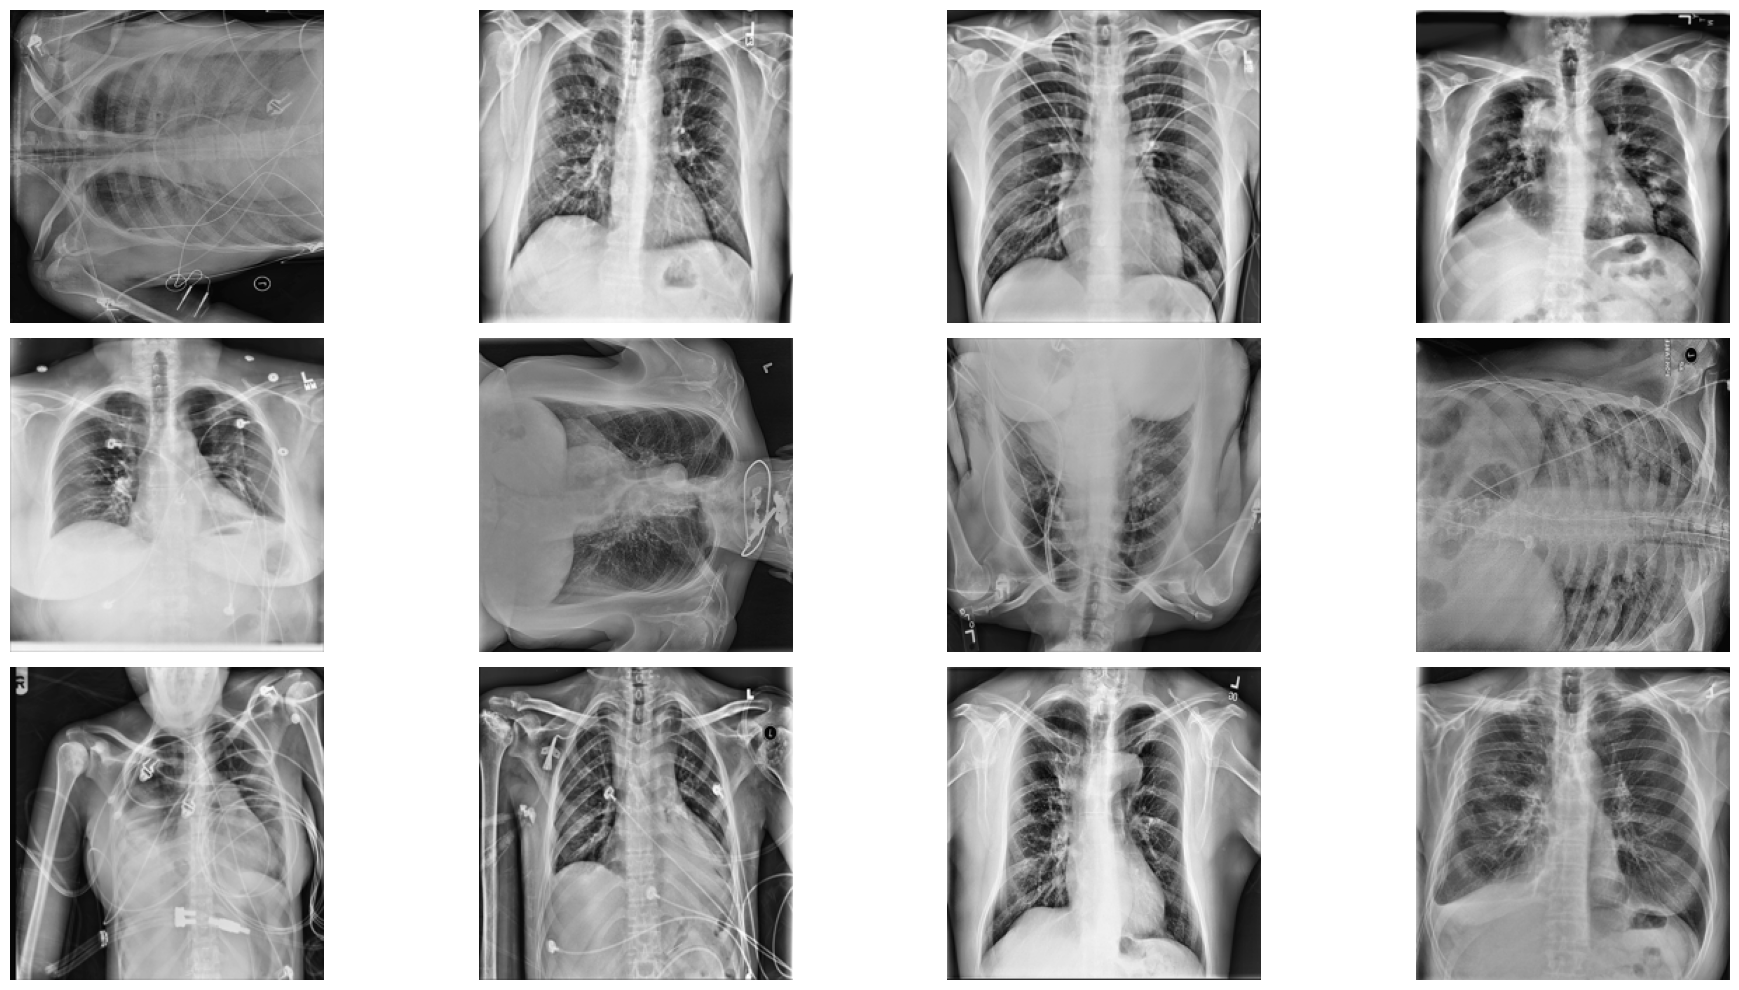

In [17]:
fig, axes = plt.subplots(3, 4, figsize=(20,10))
axes = axes.flatten()
for img, ax in zip(X, axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()


In [18]:
import keras
from keras.applications import MobileNetV2
from keras import layers, models
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, TensorBoard

In [19]:
from keras import backend as K
K.clear_session()

print(tf.config.optimizer.get_jit())  # Should print True

In [28]:
import pickle
import os

checkpoint_path = "/kaggle/working/model_checkpoint.keras"
log_path = "/kaggle/working/training_log.csv"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=False,  # Set True to save only the best model
    save_weights_only=False,
    verbose=1
)

csv_logger = CSVLogger(log_path, append=False)

with strategy.scope():
    import tensorflow as tf
    from tensorflow.keras import layers, models
    
    # Define input layer
    # input_shape = (224, 224, 3)
    # inputs = layers.Input(shape=input_shape)
    
    # Initial Standard Convolution
    # x = layers.DepthwiseConv2D(kernel_size=3, strides=1, padding='same', use_bias=False)(inputs)
    # x = layers.BatchNormalization()(x)
    # x = layers.ReLU(max_value=6)(x)  

    # x = layers.Conv2D(32, kernel_size=3, strides=2, padding='same', use_bias=False)(inputs)
    # x = layers.BatchNormalization()(x)
    # x = layers.ReLU(max_value=6)(x)  # ReLU6 Activation
    # conv_3x3 = layers.DepthwiseConv2D(kernel_size=3, strides=1, padding='same', use_bias=False)(inputs)
    # conv_3x3 = layers.BatchNormalization()(conv_3x3)
    # conv_3x3 = layers.ReLU()(conv_3x3)

    # conv_3x3 = layers.Conv2D(32, kernel_size=3, strides=1, padding='same', use_bias=False)(inputs)
    # conv_3x3 = layers.BatchNormalization()(conv_3x3)
    # conv_3x3 = layers.ReLU()(conv_3x3)
    
    # conv_5x5 = layers.Conv2D(32, kernel_size=5, strides=1, padding='same', use_bias=False)(inputs)
    # conv_5x5 = layers.BatchNormalization()(conv_5x5)
    # conv_5x5 = layers.ReLU()(conv_5x5)
    
    # conv_7x7 = layers.Conv2D(32, kernel_size=7, strides=1, padding='same', use_bias=False)(inputs)
    # conv_7x7 = layers.BatchNormalization()(conv_7x7)
    # conv_7x7 = layers.ReLU()(conv_7x7)
    
    # # Concatenating multi-scale features
    # x = layers.Concatenate()([conv_3x3, conv_5x5, conv_7x7])
    
    # # Reduce the number of channels with a 1x1 Convolution
    # x = layers.Conv2D(64, kernel_size=1, strides=1, padding='same', use_bias=False)(x)
    # x = layers.BatchNormalization()(x)
    # x = layers.ReLU()(x)
    
    # # Squeeze-and-Excitation Block to refine feature importance
    # se = layers.GlobalAveragePooling2D()(x)
    # se = layers.Dense(64 // 16, activation='relu')(se)
    # se = layers.Dense(64, activation='sigmoid')(se)
    # x = layers.Multiply()([x, se])

    
    # # Function for Inverted Residual Block with Skip Connection
    # def inverted_residual_block(inputs, expansion, filters, stride):
    #     in_channels = inputs.shape[-1]
        
    #     # Expansion phase
    #     x = layers.Conv2D(in_channels * expansion, kernel_size=1, padding='same', use_bias=False)(inputs)
    #     x = layers.BatchNormalization()(x)
    #     x = layers.ReLU(max_value=6)(x)
        
    #     # Depthwise Convolution
    #     x = layers.DepthwiseConv2D(kernel_size=3, strides=stride, padding='same', use_bias=False)(x)
    #     x = layers.BatchNormalization()(x)
    #     x = layers.ReLU(max_value=6)(x)
        
    #     # Projection phase (Reduce channels)
    #     x = layers.Conv2D(filters, kernel_size=1, padding='same', use_bias=False)(x)
    #     x = layers.BatchNormalization()(x)
    
    #     # Skip connection (Only if stride == 1 and input/output channels match)
    #     if stride == 1 and in_channels == filters:
    #         x = layers.Add()([x, inputs])  # Add input to output
    
    #     return x
    
    # # Adding Inverted Residual Blocks with Skip Connections
    # x = inverted_residual_block(x, expansion=1, filters=16, stride=1)
    # x = inverted_residual_block(x, expansion=6, filters=24, stride=2)
    # x = inverted_residual_block(x, expansion=6, filters=24, stride=1)
    # x = inverted_residual_block(x, expansion=6, filters=32, stride=2)
    # x = inverted_residual_block(x, expansion=6, filters=32, stride=1)
    # x = inverted_residual_block(x, expansion=6, filters=32, stride=1)
    # x = inverted_residual_block(x, expansion=6, filters=64, stride=2)
    # x = inverted_residual_block(x, expansion=6, filters=64, stride=1)
    # x = inverted_residual_block(x, expansion=6, filters=64, stride=1)
    # x = inverted_residual_block(x, expansion=6, filters=64, stride=1)
    # x = inverted_residual_block(x, expansion=6, filters=96, stride=1)
    # x = inverted_residual_block(x, expansion=6, filters=96, stride=1)
    # x = inverted_residual_block(x, expansion=6, filters=96, stride=1)
    # x = inverted_residual_block(x, expansion=6, filters=160, stride=2)
    # x = inverted_residual_block(x, expansion=6, filters=160, stride=1)
    # x = inverted_residual_block(x, expansion=6, filters=160, stride=1)
    # x = inverted_residual_block(x, expansion=6, filters=320, stride=1)
    
    # # Final Convolution and Pooling
    # x = layers.Conv2D(1280, kernel_size=1, use_bias=False)(x)
    # x = layers.BatchNormalization()(x)
    # x = layers.ReLU(max_value=6)(x)
    
    # # Global Average Pooling + Fully Connected Layer
    # x = layers.GlobalAveragePooling2D()(x)
    # output = layers.Dense(15, activation='sigmoid')(x)      
    base_model = MobileNetV2(weights='imagenet', include_top=False,input_shape =(224, 224, 3) )
    base_model.trainable = True
    for layer in base_model.layers[:100]:  # Keep the first 100 layers frozen
        layer.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)  # Prevent overfitting
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(15, activation="sigmoid")(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    # Create the Model
    # model = models.Model(inputs, output, name="EnhancedMobileNetV2")
    model.summary()

    from tensorflow.keras.callbacks import ReduceLROnPlateau

    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7)


    opt = tf.keras.optimizers.AdamW(learning_rate = 1e-4 , weight_decay=0.001)
    model.compile(loss="binary_crossentropy", 
                  optimizer = opt,
                  metrics = ["binary_accuracy", 
                             "f1_score",
                             tf.keras.metrics.Recall(),
                                 tf.keras.metrics.Precision(),
                             tf.keras.metrics.AUC()])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,049,039 (11.63 MB)

 Trainable params: 2,652,495 (10.12 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [53]:

import numpy as np
print(np.isnan(y_train).any())  # Check for NaN labels

# import os

# checkpoint_path = "mobilenet_checkpoint.h5"

# if os.path.exists(checkpoint_path):
#     os.remove(checkpoint_path)
#     print("🗑️ Checkpoint deleted. Starting fresh!")
# else:
#     print("🚀 No checkpoint found. Training from scratch.")

import os

# Path to the output directory
output_folder = "/kaggle/working/"

# Loop through and remove all files
for file in os.listdir(output_folder):
    file_path = os.path.join(output_folder, file)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)  # Remove file
        elif os.path.isdir(file_path):
            os.rmdir(file_path)  # Remove empty folder
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")





False


In [ ]:
# Train the model
# history_mobilenet = model.fit(
#     X_train, y_train, 
#     batch_size = 64,
#     validation_data = (X_val, y_val),
#     steps_per_epoch = len(X_train) // 64,
#     epochs = 20,
#     verbose=1)

# Train the model
history1 = model.fit(
    X_train, y_train, 
    batch_size = 16,
    validation_data=(X_val, y_val),
    # steps_per_epoch=len(X_train) // 16,
    epochs=10,
    callbacks=[checkpoint_callback,csv_logger,lr_scheduler],  # Add checkpoint callback
    verbose=1
)


Epoch 1/10
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - auc_1: 0.6163 - binary_accuracy: 0.8828 - f1_score: 0.1440 - loss: 0.3480 - precision_1: 0.2559 - recall_1: 0.0599
Epoch 1: saving model to /kaggle/working/model_checkpoint.keras
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 424s 228ms/step - auc_1: 0.6163 - binary_accuracy: 0.8828 - f1_score: 0.1440 - loss: 0.3480 - precision_1: 0.2560 - recall_1: 0.0599 - val_auc_1: 0.7485 - val_binary_accuracy: 0.9055 - val_f1_score: 0.2136 - val_loss: 0.2903 - val_precision_1: 0.5948 - val_recall_1: 0.0752 - learning_rate: 1.0000e-04
Epoch 2/10
1068/1832 ━━━━━━━━━━━━━━━━━━━━ 2:29 196ms/step - auc_1: 0.7611 - binary_accuracy: 0.9078 - f1_score: 0.2632 - loss: 0.2745 - precision_1: 0.6316 - recall_1: 0.1343

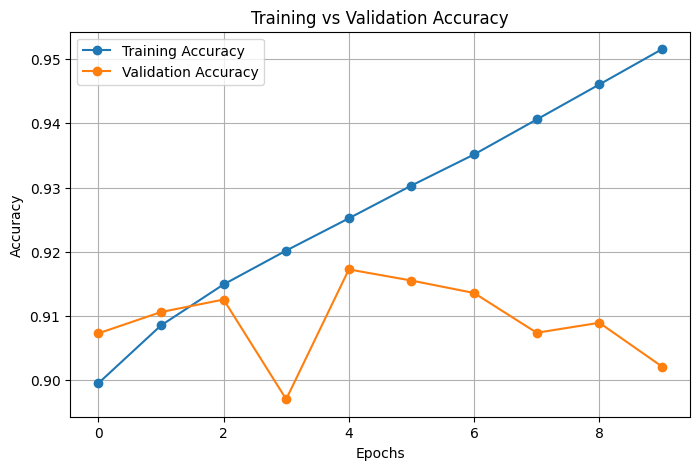

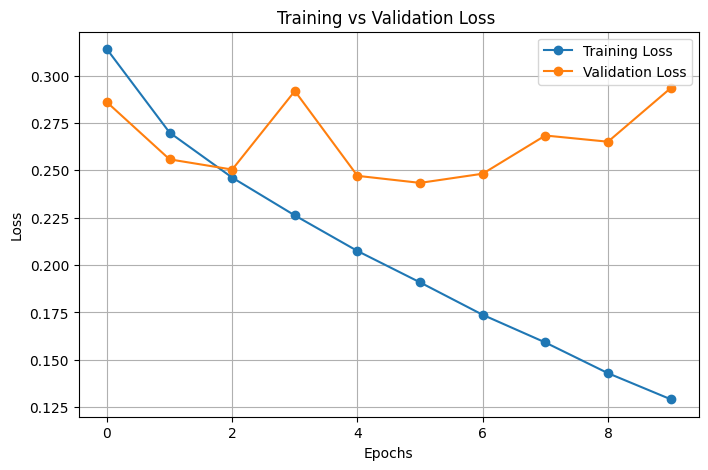

In [22]:
data = pd.read_csv(log_path)

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(data['epoch'], data['binary_accuracy'], label='Training Accuracy', marker='o')
plt.plot(data['epoch'], data['val_binary_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(data['epoch'], data['loss'], label='Training Loss', marker='o')
plt.plot(data['epoch'], data['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss ')
plt.legend()
plt.grid()
plt.show()

In [24]:
selected_labels = ['Atelectasis','Cardiomegaly','Consolidation','Edema','Effusion','Emphysema','Fibrosis','Hernia','Infiltration',
              'Mass','No Finding','Nodule','Pleural_Thickening','Pneumonia','Pneumothorax']

assert len(selected_labels) == y_test.shape[1]

198/198 ━━━━━━━━━━━━━━━━━━━━ 51s 256ms/step
0.8203824834350832


Text(0, 0.5, 'True Positive Rate')

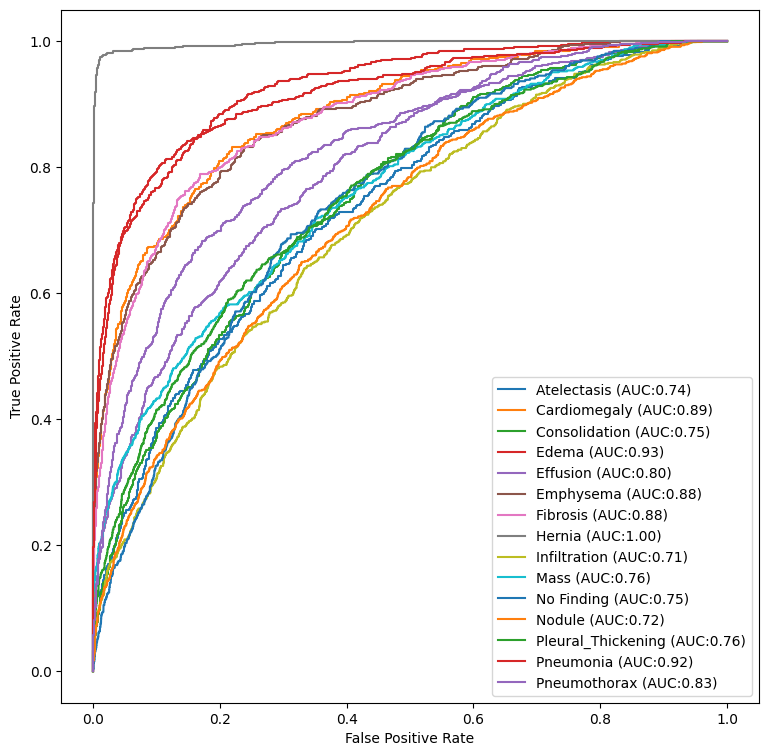

In [25]:
y_pred = model.predict(X_test)
y_pred[:5]


from sklearn.metrics import roc_curve, auc,f1_score
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
mean_auc = 0
for (idx, c_label) in enumerate(selected_labels):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    mean_auc += auc(fpr, tpr)

mean_auc /= 15
print(mean_auc)
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

# ye purana wala code hai auc ka changes karna padega isme

In [26]:
# Resume logging (append mode)
csv_logger = CSVLogger(log_path, append=True)

# Load model from the last checkpoint

with strategy.scope():
    model = tf.keras.models.load_model(checkpoint_path)

print("✅ Model restored from checkpoint!")

# Continue training for 5 more epochs
history2 = model.fit(
    X_train, y_train, 
    batch_size=16,
    validation_data=(X_val, y_val),
    # steps_per_epoch=len(X_train) // 64,
    epochs=15,
    initial_epoch=10,
    callbacks=[checkpoint_callback,csv_logger],  # Add checkpoint callback
    verbose=1
)

print("✅ Total 15 epochs completed!")



✅ Model restored from checkpoint!
Epoch 11/15
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - auc: 0.9687 - binary_accuracy: 0.9575 - f1_score: 0.6689 - loss: 0.1137 - precision: 0.8629 - recall: 0.6739
Epoch 11: saving model to /kaggle/working/model_checkpoint.keras
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 423s 227ms/step - auc: 0.9687 - binary_accuracy: 0.9575 - f1_score: 0.6689 - loss: 0.1137 - precision: 0.8629 - recall: 0.6739 - val_auc: 0.8109 - val_binary_accuracy: 0.9029 - val_f1_score: 0.3406 - val_loss: 0.3079 - val_precision: 0.4979 - val_recall: 0.3962
Epoch 12/15
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - auc: 0.9746 - binary_accuracy: 0.9616 - f1_score: 0.6907 - loss: 0.1030 - precision: 0.8730 - recall: 0.7136
Epoch 12: saving model to /kaggle/working/model_checkpoint.keras
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 414s 226ms/step - auc: 0.9746 - binary_accuracy: 0.9616 - f1_score: 0.6907 - loss: 0.1030 - precision: 0.8730 - recall: 0.7136 - val_auc: 0.8228 - val_binary_accuracy: 0.9062 -

KeyboardInterrupt: 

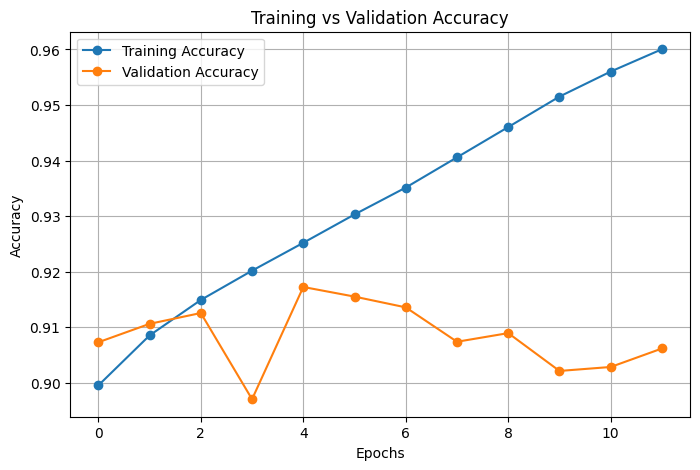

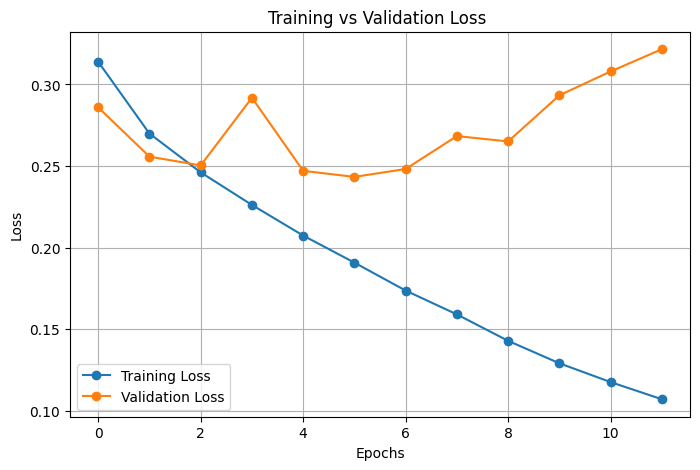

In [27]:
data = pd.read_csv(log_path)

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(data['epoch'], data['binary_accuracy'], label='Training Accuracy', marker='o')
plt.plot(data['epoch'], data['val_binary_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(data['epoch'], data['loss'], label='Training Loss', marker='o')
plt.plot(data['epoch'], data['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss ')
plt.legend()
plt.grid()
plt.show()

In [25]:
csv_logger = CSVLogger(log_path, append=True)

# Load model from the last checkpoint
with strategy.scope():
    model = tf.keras.models.load_model(checkpoint_path)

print("✅ Model restored from checkpoint!")

# Continue training for 5 more epochs
history3 = model.fit(
    X_train, y_train, 
    batch_size=32,
    validation_data=(X_val, y_val),
    # steps_per_epoch=len(X_train) // 16,
    epochs=20,
    initial_epoch=10,
    callbacks=[checkpoint_callback,csv_logger],  # Add checkpoint callback
    verbose=1
)

print("✅ Total 20 epochs completed!")

✅ Model restored from checkpoint!
Epoch 11/20
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - auc: 0.7544 - binary_accuracy: 0.9080 - f1_score: 0.2416 - loss: 0.2739 - precision: 0.6596 - recall: 0.0709
Epoch 11: saving model to /kaggle/working/model_checkpoint.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - auc: 0.7543 - binary_accuracy: 0.9080 - f1_score: 0.2415 - loss: 0.2740 - precision: 0.6591 - recall: 0.0710 - val_auc: 0.7412 - val_binary_accuracy: 0.9078 - val_f1_score: 0.1898 - val_loss: 0.2749 - val_precision: 0.5647 - val_recall: 0.0498
Epoch 12/20
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - auc: 0.7618 - binary_accuracy: 0.9073 - f1_score: 0.2455 - loss: 0.2742 - precision: 0.6829 - recall: 0.0846
Epoch 12: saving model to /kaggle/working/model_checkpoint.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - auc: 0.7617 - binary_accuracy: 0.9073 - f1_score: 0.2454 - loss: 0.2742 - precision: 0.6823 - recall: 0.0846 - val_auc: 0.7426 - val_binary_accuracy: 0.9077 - val_f1_score: 0.1957 -

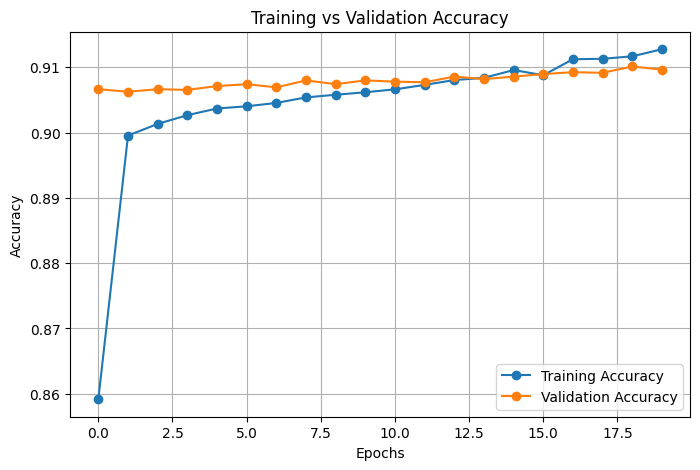

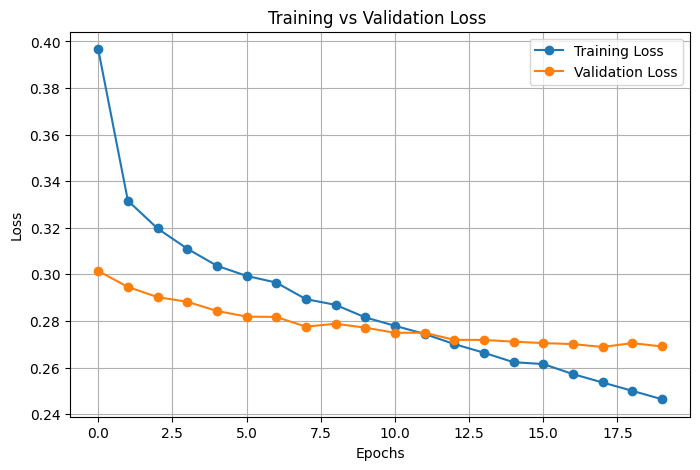

In [26]:
data = pd.read_csv(log_path)

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(data['epoch'], data['binary_accuracy'], label='Training Accuracy', marker='o')
plt.plot(data['epoch'], data['val_binary_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(data['epoch'], data['loss'], label='Training Loss', marker='o')
plt.plot(data['epoch'], data['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss ')
plt.legend()
plt.grid()
plt.show()


In [27]:
csv_logger = CSVLogger(log_path, append=True)

# Load model from the last checkpoint
with strategy.scope():
    model = tf.keras.models.load_model(checkpoint_path)

print("✅ Model restored from checkpoint!")

# Continue training for 5 more epochs
history4 = model.fit(
    X_train, y_train, 
    batch_size=16,
    validation_data=(X_val, y_val),
    # steps_per_epoch=len(X_train) // 16,
    epochs=40,
    initial_epoch=20,
    callbacks=[checkpoint_callback,csv_logger],  # Add checkpoint callback
    verbose=1
)

print("✅ Total 40 epochs completed!")

✅ Model restored from checkpoint!
Epoch 21/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - auc: 0.8219 - binary_accuracy: 0.9118 - f1_score: 0.3247 - loss: 0.2477 - precision: 0.7249 - recall: 0.1462
Epoch 21: saving model to /kaggle/working/model_checkpoint.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - auc: 0.8218 - binary_accuracy: 0.9118 - f1_score: 0.3247 - loss: 0.2477 - precision: 0.7248 - recall: 0.1462 - val_auc: 0.7549 - val_binary_accuracy: 0.9098 - val_f1_score: 0.2143 - val_loss: 0.2695 - val_precision: 0.5879 - val_recall: 0.1110
Epoch 22/40
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - auc: 0.8302 - binary_accuracy: 0.9128 - f1_score: 0.3408 - loss: 0.2435 - precision: 0.7389 - recall: 0.1549
Epoch 22: saving model to /kaggle/working/model_checkpoint.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - auc: 0.8302 - binary_accuracy: 0.9128 - f1_score: 0.3408 - loss: 0.2435 - precision: 0.7388 - recall: 0.1549 - val_auc: 0.7567 - val_binary_accuracy: 0.9102 - val_f1_score: 

In [ ]:
print("First few labels:", y_train[:10])


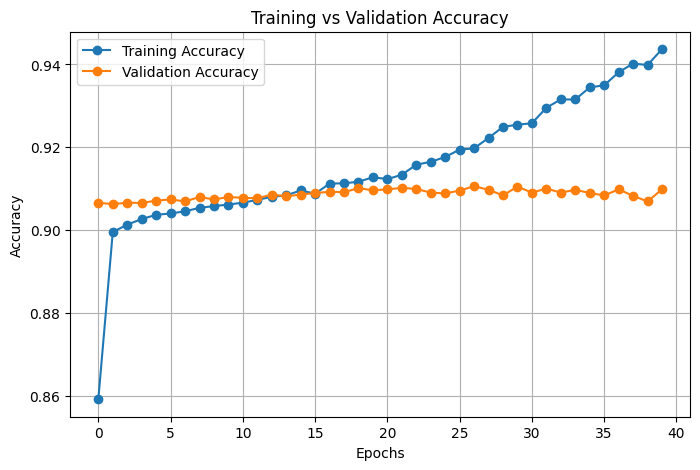

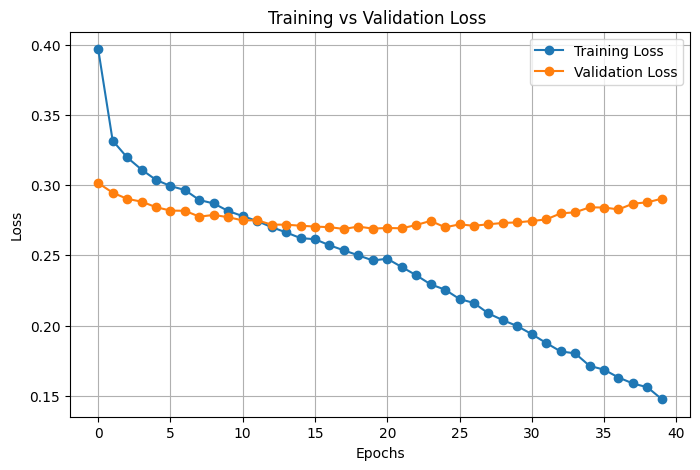

In [28]:
# Load the full training log
data = pd.read_csv(log_path)

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(data['epoch'], data['binary_accuracy'], label='Training Accuracy', marker='o')
plt.plot(data['epoch'], data['val_binary_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(data['epoch'], data['loss'], label='Training Loss', marker='o')
plt.plot(data['epoch'], data['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss ')
plt.legend()
plt.grid()
plt.show()


In [29]:
selected_labels = ['Atelectasis','Cardiomegaly','Consolidation','Edema','Effusion','Emphysema','Fibrosis','Hernia','Infiltration',
              'Mass','No Finding','Nodule','Pleural_Thickening','Pneumonia','Pneumothorax']

assert len(selected_labels) == y_test.shape[1]

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step
0.7429578497379967


Text(0, 0.5, 'True Positive Rate')

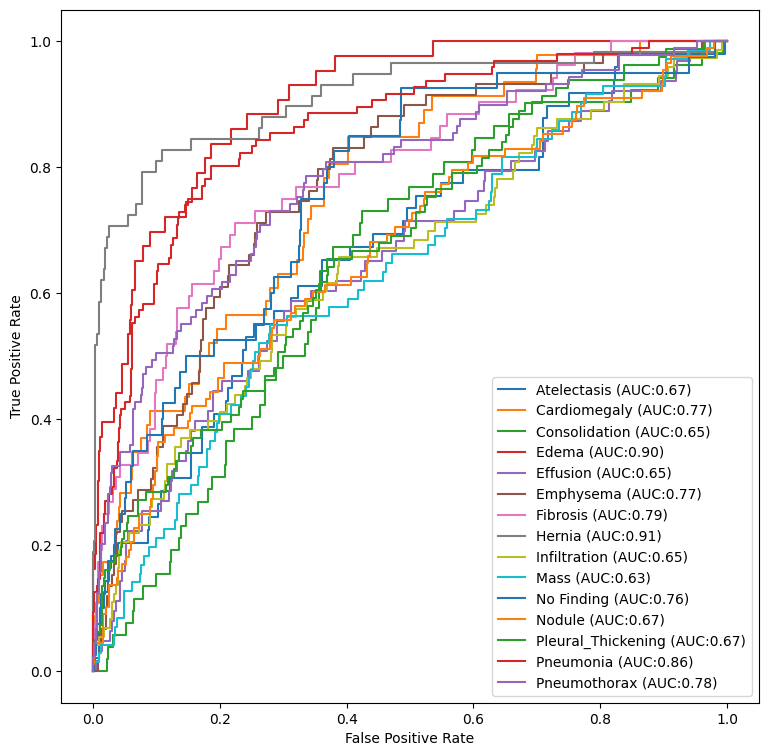

In [30]:
y_pred = model.predict(X_test)
y_pred[:5]


from sklearn.metrics import roc_curve, auc,f1_score
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
mean_auc = 0
for (idx, c_label) in enumerate(selected_labels):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    mean_auc += auc(fpr, tpr)

mean_auc /= 15
print(mean_auc)
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

# ye purana wala code hai auc ka changes karna padega isme

In [31]:
csv_logger = CSVLogger(log_path, append=True)

# Load model from the last checkpoint
with strategy.scope():
    model = tf.keras.models.load_model(checkpoint_path)

print("✅ Model restored from checkpoint!")

# Continue training for 5 more epochs
history4 = model.fit(
    X_train, y_train, 
    batch_size=16,
    validation_data=(X_val, y_val),
    # steps_per_epoch=len(X_train) // 16,
    epochs=80,
    initial_epoch=40,
    callbacks=[checkpoint_callback,csv_logger],  # Add checkpoint callback
    verbose=1
)

print("✅ Total 80 epochs completed!")

✅ Model restored from checkpoint!
Epoch 41/80
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - auc: 0.9615 - binary_accuracy: 0.9460 - f1_score: 0.6198 - loss: 0.1415 - precision: 0.8922 - recall: 0.5040
Epoch 41: saving model to /kaggle/working/model_checkpoint.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - auc: 0.9615 - binary_accuracy: 0.9460 - f1_score: 0.6198 - loss: 0.1415 - precision: 0.8921 - recall: 0.5040 - val_auc: 0.7456 - val_binary_accuracy: 0.9092 - val_f1_score: 0.2339 - val_loss: 0.2954 - val_precision: 0.5464 - val_recall: 0.1587
Epoch 42/80
194/196 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - auc: 0.9596 - binary_accuracy: 0.9465 - f1_score: 0.6194 - loss: 0.1399 - precision: 0.8740 - recall: 0.5129
Epoch 42: saving model to /kaggle/working/model_checkpoint.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - auc: 0.9596 - binary_accuracy: 0.9465 - f1_score: 0.6194 - loss: 0.1399 - precision: 0.8740 - recall: 0.5130 - val_auc: 0.7378 - val_binary_accuracy: 0.9072 - val_f1_score: 

In [33]:
csv_logger = CSVLogger(log_path, append=True)

# Load model from the last checkpoint
with strategy.scope():
    model = tf.keras.models.load_model(checkpoint_path)

print("✅ Model restored from checkpoint!")

# Continue training for 5 more epochs
history4 = model.fit(
    X_train, y_train, 
    batch_size=16,
    validation_data=(X_val, y_val),
    # steps_per_epoch=len(X_train) // 16,
    epochs=160,
    initial_epoch=80,
    callbacks=[checkpoint_callback,csv_logger],  # Add checkpoint callback
    verbose=1
)

print("✅ Total 160 epochs completed!")

✅ Model restored from checkpoint!
Epoch 81/160
194/196 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - auc: 0.9981 - binary_accuracy: 0.9890 - f1_score: 0.7965 - loss: 0.0367 - precision: 0.9705 - recall: 0.9134
Epoch 81: saving model to /kaggle/working/model_checkpoint.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - auc: 0.9981 - binary_accuracy: 0.9889 - f1_score: 0.7965 - loss: 0.0367 - precision: 0.9705 - recall: 0.9133 - val_auc: 0.7017 - val_binary_accuracy: 0.9030 - val_f1_score: 0.2511 - val_loss: 0.4280 - val_precision: 0.4556 - val_recall: 0.2075
Epoch 82/160
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - auc: 0.9980 - binary_accuracy: 0.9879 - f1_score: 0.7908 - loss: 0.0379 - precision: 0.9659 - recall: 0.9061
Epoch 82: saving model to /kaggle/working/model_checkpoint.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - auc: 0.9980 - binary_accuracy: 0.9879 - f1_score: 0.7909 - loss: 0.0379 - precision: 0.9659 - recall: 0.9062 - val_auc: 0.6992 - val_binary_accuracy: 0.9032 - val_f1_score

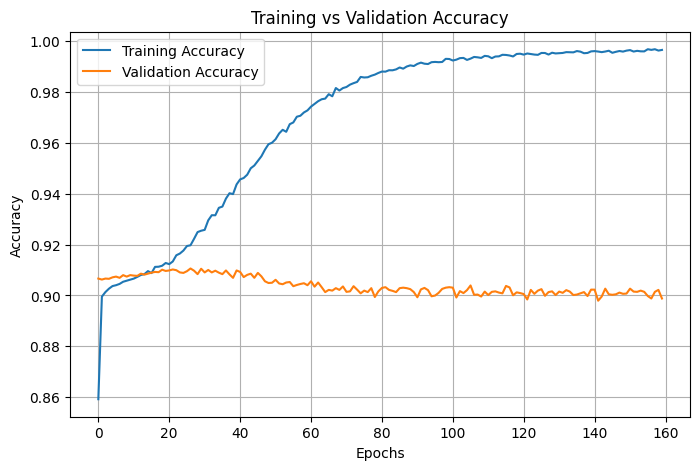

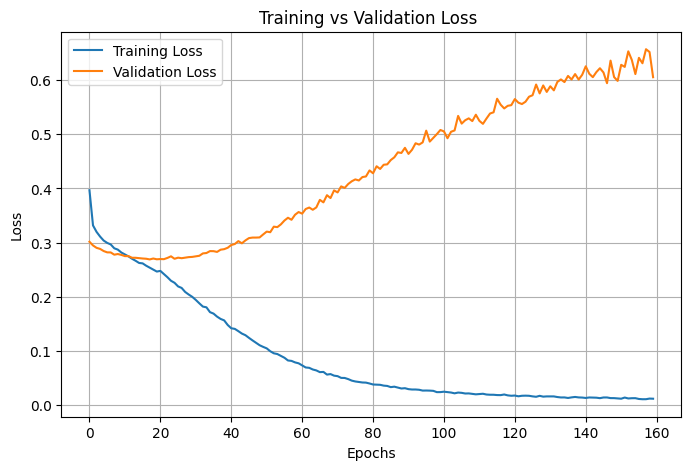

In [35]:
# Load the full training log
data = pd.read_csv(log_path)

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(data['epoch'], data['binary_accuracy'], label='Training Accuracy')
plt.plot(data['epoch'], data['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(data['epoch'], data['loss'], label='Training Loss')
plt.plot(data['epoch'], data['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss ')
plt.legend()
plt.grid()
plt.show()
